<a href="https://colab.research.google.com/github/adindanoorsaid/Pemograman_Python/blob/main/Tugas_Besar_Bagian_4_1101184048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adinda Febriyana Noorsaid

1101184048

TT-43-G7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
NTL = lambda x: 10*np.log10(x)
LTN = lambda x: 10**(x/10)

# 1. Fungsi perhitungan daya terima





In [ ]:
def Prx(d,f,Ptx):
  # konversi nilai Ptx dari watt ke dBW
  Pdb = NTL(Ptx)
  # menghitung pathloss
  pldb = 32.5 + (20*np.log10(d)) + (20*np.log10(f))
  # menghitung Prx dalam dB
  prdb = Pdb - pldb
  # mengubah daya terima ke bentuk numerik
  prx = LTN(prdb)
  return prx,prdb

In [ ]:
PRX,PRDB = Prx(5,700,4000)
print('Daya terima adalah = ',PRX/1000,'mW')
print('Daya terima adalah = ',PRDB,'dBw')


#2. Fungsi perhitungan Signal to Noise Ratio (SNR) :

In [ ]:
# menghitung N
def noise(B):
  # B adalah bandwidth dalam Hz
  # N = k.T.B 
  # 290 = T (suhu device)
  # N = 1.38*(10**(-23))*290*B
  x = LTN(-144)
  N = x * B
  return N

In [ ]:
Noise = noise(180000)
Noise

7.165929069962945e-10

In [ ]:
SNR = PRX/Noise
SNR

256.2426384803185

# 3. Fungsi perhitungan kapasitas seluler :

In [ ]:
def kapasitas(SNR,B):
  kapasitas_seluler = B * np.log10(1+SNR)
  return kapasitas_seluler

a=kapasitas(256.2426384803185,5000000)
print("Kapasitas =",a,'Bps')

Kapasitas = 12051714.77697564 Bps


# Grafik Variasi Lokasi

In [ ]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [ ]:
# nilai input
f=1800 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [ ]:
LpUrban=cos(f,loc1,tower,user,d)
LpOpen=cos(f,loc2,tower,user,d)
LpSuburban=cos(f,loc3,tower,user,d)
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]

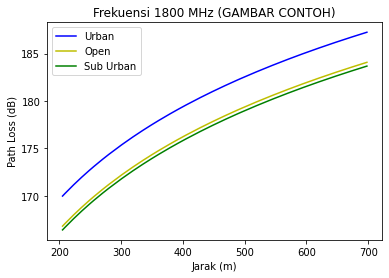

In [ ]:
plt.figure()
plt.plot(d_sort, Urban_sort, 'b', label='Urban')
plt.plot(d_sort, Open_sort, 'y', label='Open')
plt.plot(d_sort, Suburban_sort, 'g', label='Sub Urban')
plt.legend()
plt.title('Frekuensi 1800 MHz (GAMBAR CONTOH)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

# Grafik Variasi Frekuensi

In [ ]:
# Nilai Input
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [ ]:
LpUrban1=cos(f1,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)
d_sort=d[np.argsort(d)]
Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]


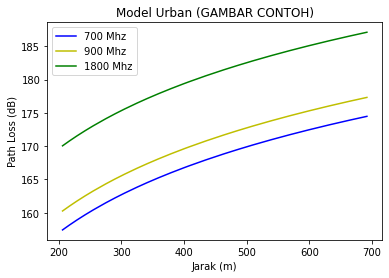

In [ ]:
plt.figure()
plt.plot(d_sort, Urban1_sort, 'b', label='700 Mhz')
plt.plot(d_sort, Urban2_sort, 'y', label='900 Mhz')
plt.plot(d_sort, Urban3_sort, 'g', label='1800 Mhz')
plt.legend()
plt.title('Model Urban (GAMBAR CONTOH)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()